# Linear Regression with SGD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [2]:
def train(X, T, learning_rate, n_epochs, verbose=False):

    # Calculate means and standard deviations of each column in X and T
    X_np = np.array(X)
    T_np = np.array(T)
    
    Xmeans = np.mean(X, axis=0)
    Xstds  = np.std(X, axis=0)
    Tmeans = np.mean(T, axis=0)
    Tstds = np.std(T, axis=0)
    
    # Use the means and standard deviations to standardize X and T
    X = (X - Xmeans) / Xstds
    T = (T - Tmeans) / Tstds

    # Insert the column of constant 1's as a new initial column in X
    X = np.insert(X, 0, 1, axis=1)
    
    # Initialize weights to be a numpy array of the correct shape and all zeros values.
    w = np.zeros((X.shape[1], T.shape[1]))

    n_samples = X.shape[0]
    for epoch in range(n_epochs):
        sqerror_sum = 0
        for n in range(n_samples):

            # Use current weight values to predict output for sample n, then
            # calculate the error, and
            # update the weight values.
            y = X[n:n + 1, :] @ w
            error = T[n:n + 1, :] - y
            
            # Add the squared error to sqerror_sum
            w += learning_rate * X[n:n +1, :].T * error
            sqerror_sum += error ** 2
            
        if verbose and (n_epochs < 11 or (epoch + 1) % (n_epochs // 10) == 0):
            rmse = np.sqrt(sqerror_sum / n_samples)
            rmse = rmse[0, 0]  # because rmse is 1x1 matrix
            print(f'Epoch {epoch + 1} RMSE {rmse:.2f}')

    return {'w': w, 'Xmeans': Xmeans, 'Xstds': Xstds,
            'Tmeans': Tmeans, 'Tstds': Tstds}

In [3]:
def use(X, model):
    # Standardize X using Xmeans and Xstds in model
    X = (X - model['Xmeans']) / model['Xstds']
    X = np.insert(X, 0, 1, axis=1)
    
    # Predict output values using weights in model
    output = X @ model['w']
    
    # Unstandardize the predicted output values using Tmeans and Tstds in model
    output =  output * model['Tstds'] + model['Tmeans']
    
    # Return the unstandardized output values
    return (output.reshape(-1,1))

In [4]:
def rmse(A, B):
    return np.sqrt(np.mean((A-B)**2))

Text(0, 0.5, 'T')

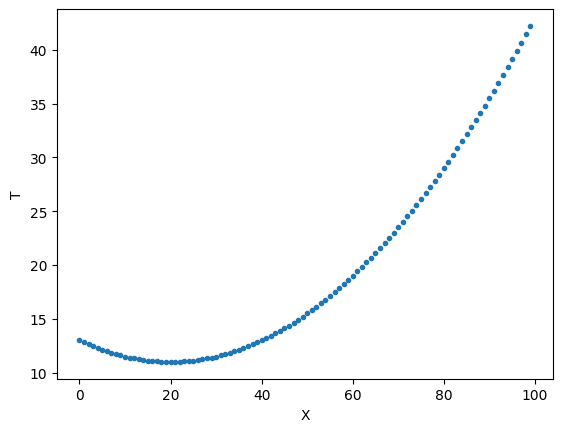

In [5]:
X = np.arange(0, 100).reshape(-1, 1)  # make X a 100 x 1 matrix
T = 0.5 + 0.3 * X + 0.005 * (X - 50) ** 2
plt.plot(X, T, '.')
plt.xlabel('X')
plt.ylabel('T')

In [6]:
model = train(X, T, 0.01, 50, verbose=True)
model

Epoch 5 RMSE 0.40
Epoch 10 RMSE 0.40
Epoch 15 RMSE 0.40
Epoch 20 RMSE 0.40
Epoch 25 RMSE 0.40
Epoch 30 RMSE 0.40
Epoch 35 RMSE 0.40
Epoch 40 RMSE 0.40
Epoch 45 RMSE 0.40
Epoch 50 RMSE 0.40


{'w': array([[-0.00576098],
        [ 1.05433338]]),
 'Xmeans': array([49.5]),
 'Xstds': array([28.86607005]),
 'Tmeans': array([19.5175]),
 'Tstds': array([9.29491938])}

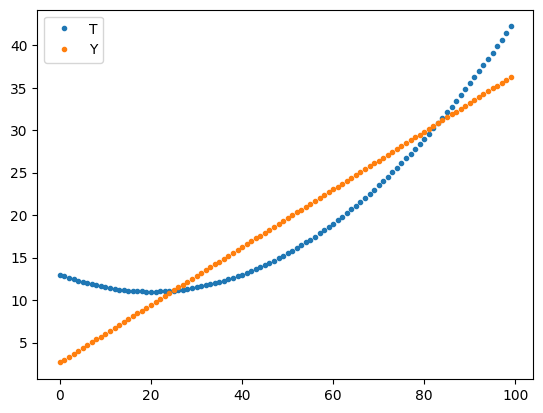

In [7]:
Y = use(X, model)
plt.plot(T, '.', label='T')
plt.plot(Y, '.', label='Y')
plt.legend()

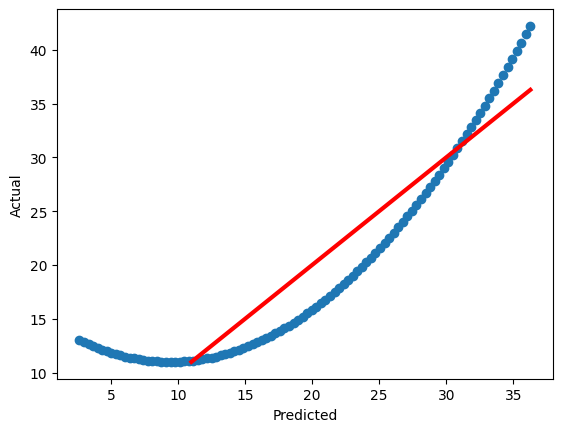

In [8]:
plt.plot(Y[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(Y[:, 0]), min(T[:, 0]))
b = min(max(Y[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)

## Weather Data

[CSU's CoAgMet Station Daily Data Access](http://coagmet.colostate.edu/cgi-bin/dailydata_form.pl)

Get the data file [here](http://www.cs.colostate.edu/~cs445/notebooks/A1_data.txt)

In [5]:
import pandas as pd
df = pd.read_csv('https://www.cs.colostate.edu/~cs445/notebooks/A1_data.txt', sep=r'[ \t]\s*', engine='python', na_values='***')

In [6]:
df.isna().sum()

Year          0
Mo            0
Dy            0
tave          0
tmax          0
mxtm          0
tmin          0
mntm          0
vp            0
rhmax         0
rhmxtm        0
rhmin         0
rhmntm        0
sr            0
wrun          0
pp            0
st5mx       211
st5mxtm     211
st5mn       211
st5mntm     211
st15mx        0
st15mxtm      0
st15mn        0
st15mntm      0
volts       365
year          0
gust          0
gusttm        0
gusdir      365
etr_asce      0
dtype: int64

In [7]:
df = df.dropna(axis=1) # dropping all columns where there are na values
df.isna().sum(), df.shape

(Year        0
 Mo          0
 Dy          0
 tave        0
 tmax        0
 mxtm        0
 tmin        0
 mntm        0
 vp          0
 rhmax       0
 rhmxtm      0
 rhmin       0
 rhmntm      0
 sr          0
 wrun        0
 pp          0
 st15mx      0
 st15mxtm    0
 st15mn      0
 st15mntm    0
 year        0
 gust        0
 gusttm      0
 etr_asce    0
 dtype: int64,
 (365, 24))

Create a linear model that predicts the next day's average temperature (tave) from the previous day's values. A discription of all features can be found [here](https://coagmet.colostate.edu/rawdata_docs.php). 
1. tave: average temperature
2. tmax: maximum temperature
3. tmin: minimum temperature
4. vp: vapor pressure
5. rhmax: maximum relative humidity
6. rhmin: minimum relative humidity
7. pp: precipitation
8. gust: wind gust speed

In [8]:
Xnames = ['tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust']
Tnames = ['next tave']

In [9]:
df = df[Xnames]
data = df.values

In [10]:
X = data[:-1, :]
X.shape

(364, 8)

In [11]:
T = data[1:, 0]
T = T.reshape(-1,1)
T.shape

(364, 1)

In [16]:
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]

for lr in learning_rates:
    print(f'Testing with Learning Rate {lr}')
    model = train(X, T, lr, 100, verbose=True)
    print()

Testing with Learning Rate 0.1
Epoch 10 RMSE 0.63
Epoch 20 RMSE 0.63
Epoch 30 RMSE 0.63
Epoch 40 RMSE 0.63
Epoch 50 RMSE 0.63
Epoch 60 RMSE 0.63
Epoch 70 RMSE 0.63
Epoch 80 RMSE 0.63
Epoch 90 RMSE 0.63
Epoch 100 RMSE 0.63

Testing with Learning Rate 0.01
Epoch 10 RMSE 0.34
Epoch 20 RMSE 0.34
Epoch 30 RMSE 0.34
Epoch 40 RMSE 0.34
Epoch 50 RMSE 0.34
Epoch 60 RMSE 0.34
Epoch 70 RMSE 0.34
Epoch 80 RMSE 0.34
Epoch 90 RMSE 0.34
Epoch 100 RMSE 0.34

Testing with Learning Rate 0.001
Epoch 10 RMSE 0.33
Epoch 20 RMSE 0.33
Epoch 30 RMSE 0.33
Epoch 40 RMSE 0.33
Epoch 50 RMSE 0.33
Epoch 60 RMSE 0.33
Epoch 70 RMSE 0.33
Epoch 80 RMSE 0.33
Epoch 90 RMSE 0.33
Epoch 100 RMSE 0.33

Testing with Learning Rate 0.0001
Epoch 10 RMSE 0.42
Epoch 20 RMSE 0.35
Epoch 30 RMSE 0.34
Epoch 40 RMSE 0.33
Epoch 50 RMSE 0.33
Epoch 60 RMSE 0.33
Epoch 70 RMSE 0.33
Epoch 80 RMSE 0.33
Epoch 90 RMSE 0.33
Epoch 100 RMSE 0.33

Testing with Learning Rate 1e-05
Epoch 10 RMSE 0.89
Epoch 20 RMSE 0.79
Epoch 30 RMSE 0.70
Epoch 40 RMS

RMSE: 3.31661


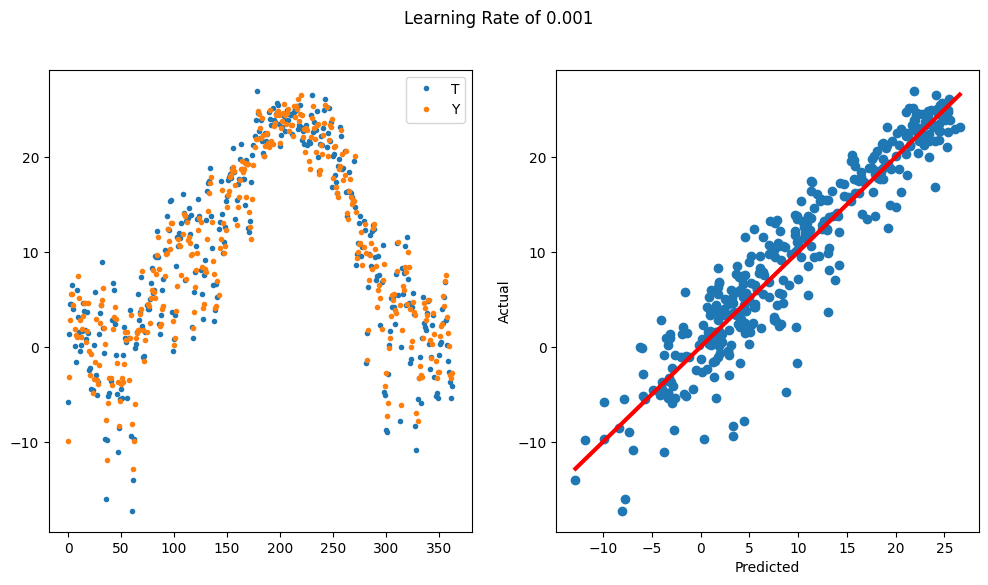

In [16]:
model = train(X, T, 0.001, 100)
Y =  use(X, model)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(T, '.', label='T')
plt.plot(Y, '.', label='Y')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Y[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(Y[:, 0]), min(T[:, 0]))
b = min(max(Y[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)
plt.suptitle("Learning Rate of 0.001")

weather_rmse = rmse(Y, T)
print(f'RMSE: {weather_rmse:0.5f}')

RMSE: 4.14174


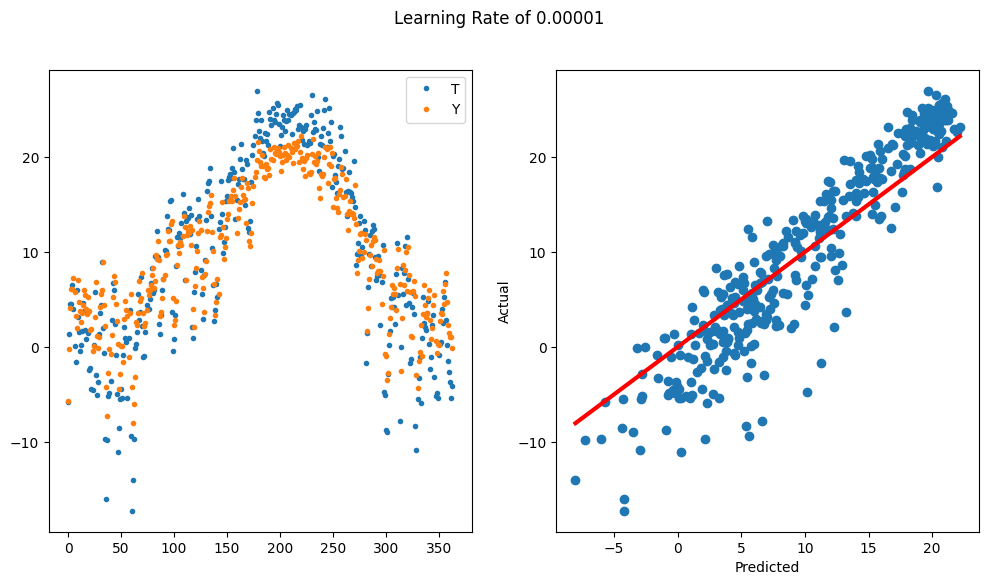

In [17]:
model = train(X, T, 0.00001, 100)
Y =  use(X, model)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(T, '.', label='T')
plt.plot(Y, '.', label='Y')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Y[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(Y[:, 0]), min(T[:, 0]))
b = min(max(Y[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)
plt.suptitle("Learning Rate of 0.00001")

weather_rmse = rmse(Y, T)
print(f'RMSE: {weather_rmse:0.5f}')

RMSE: 6.33042


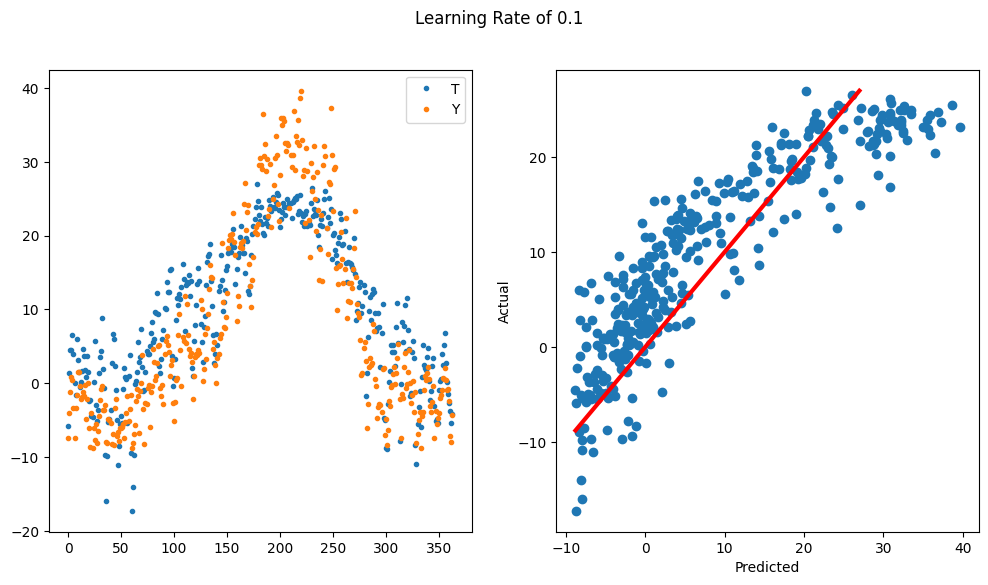

In [18]:
model = train(X, T, 0.1, 100)
Y =  use(X, model)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(T, '.', label='T')
plt.plot(Y, '.', label='Y')
plt.legend()

plt.subplot(1,2,2)
plt.plot(Y[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(Y[:, 0]), min(T[:, 0]))
b = min(max(Y[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)
plt.suptitle("Learning Rate of 0.1")

weather_rmse = rmse(Y, T)
print(f'RMSE: {weather_rmse:0.5f}')

**For the regression model used in plotting, I took the three different learning rates, one that produced the lowest RMSE, 0.001, and two on the opposite ends, 0.00001 and 0.1, in the first part of the problem. Using this and epochs as 100, I produced the two graphs seen above for each learning rate. The graph on the left shows the target values in blue and the predicted values in the red. For the learning rate of 0.001, you can see that both follow the same trends and match each other well. The graph in the right displays the regression analysis with the actual and predicted values graphed against each other. The line is almost perfectly linear, which indicates that the model is great fit for the data and the predicted results are identical to the actual data. In the other two graphs, the line is not so linear and could do a better job of fitting the data. The target and predicted values also do not match up as well as for 0.001. Below the graphs is a RMSE value for the model. From this, it can also be observed that the model using 0.001 is predicting well and similar to the actual values as the value is very low. In comparison, the other two have larger RMSE values, indicating that they are not the best models for the data.**

Print the weight values in the resulting model along with their corresponding variable names (in `Xnames`). Use the relative magnitude
of the weight values to discuss which input variables are most significant in predicting the changes in the tave values.

In [19]:
Xnames = np.insert(Xnames, 0, 'bias', 0)
print('Weights for predicting the next day\'s average temperature')
for wi, name in zip(model['w'], Xnames):
    print(f'{name:s}\t{float(wi):7.4f}')  

Weights for predicting the next day's average temperature
bias	-0.0036
tave	 0.2486
tmax	 0.2443
tmin	 0.2400
vp	 0.2324
rhmax	-0.0281
rhmin	-0.0403
pp	 0.0272
gust	-0.1027


**The most significant predictors are the variables with the highest weight values. A negative value implies that they have negative impact on the tave value, which means that an increase in the gust will decrease the tave for the next day. A positive value has the opposite effect and will result in an increased tave value. Tave, tmax, and tmin have have the highest weights,implying that they are the most significant predictors. This does make sense, as the next day temeprature tends to be in the similar range of the previous day. So, if the temperature is high today, it can be expected that the temperature tomorrow will also follow the same patterns.**